# Loads the processed h5 file and plots data
### the minimalist way (using analysis.py)

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import h5py
import time
import sys
from scipy import signal as ssig

sys.path.insert(0, '../src/')
from data_analysis import *
from integrators import *
from analysis import *

In [2]:
# input parameters
run = '0018_droplets_10um_2mm'

# constants
detector_distance = 0.12
energy = 9.5

# analysis parameters
iq_thr = 0.7

### load  and analyse data

In [3]:
# load data
img,Iq,r,nshots,i0,laser_i0,laser_on,event_ID = load_processed_data(run)

# convert q_scale
q = q_scale(r,detector_distance=detector_distance)

# convert intensity to photon/pix
img/=energy
Iq /=energy
i0 /=energy

# normalise to i0
Iq_norm = np.zeros(Iq.shape)
i0_avg = np.average(i0)
norm = i0/i0_avg

for i in range(1,nshots):
    Iq_norm[i]=Iq[i]/norm[i]
    
# find hits
metric,hits = find_hits(Iq_norm,threshold=iq_thr)
hit_rate =len(hits[hits>0])/nshots

# pump probe signal
hit_avg,miss_avg,diff_signal,diff_error =  pump_probe_signal(Iq,hits,laser_on,q_min = 20, q_max = 30)

run0018_droplets_10um_2mm: 18000 shots


### plot

<IPython.core.display.Javascript object>


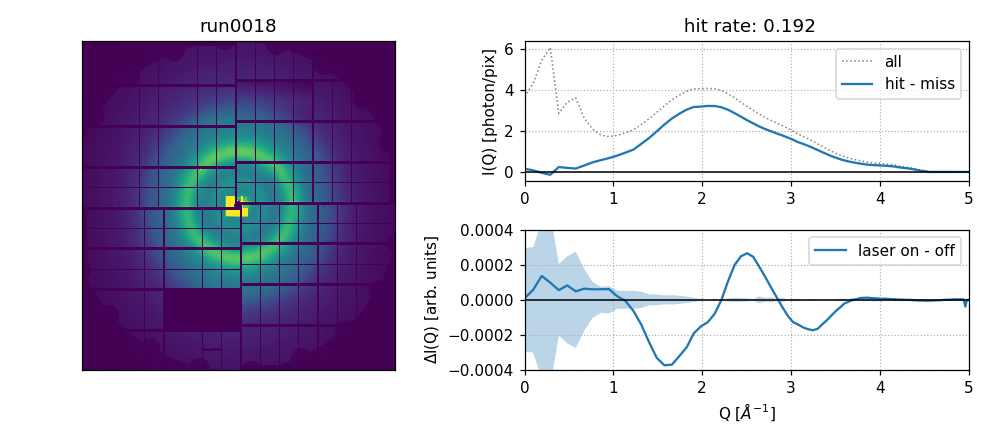

In [4]:
plt.figure(figsize=[9,4])

# 2d image
plt.subplot(1,2,1)
plt.title('run%s'%run[:4])
plt.imshow(img/nshots,clim=[0,2.5],origin='lower')
#plt.colorbar()
plt.xticks([],'')
plt.yticks([],'')
plt.tight_layout()

# radial profile
plt.subplot(2,2,2)
plt.title(' hit rate: %.3f'%(hit_rate))
plt.plot(q, hit_avg,':',c='gray' ,lw=1,label='all')
plt.plot(q, hit_avg - miss_avg, label='hit - miss')
plt.ylabel('I(Q) [photon/pix]')
plt.legend(loc='upper right')
plt.axhline(0,c='black',lw=1)
plt.xlim(0,5)
plt.grid(linestyle='dotted')

# pump probe signal
ax = plt.subplot(2,2,4)
ax.plot(q, diff_signal, label='laser on - off')
ax.fill_between(q, -diff_error, diff_error, alpha=0.3)
plt.ylabel('$\Delta$I(Q) [arb. units]')
plt.ylim([-4e-4,4e-4])#plt.figure()
plt.xlabel('Q [$\AA^{-1}$]')
plt.legend(loc='upper right')
plt.xlim(0,5)
plt.axhline(0,c='black',lw=1)
plt.grid(linestyle='dotted')

plt.tight_layout()
#plt.savefig('run%.png' % n_shots)
plt.show()


<IPython.core.display.Javascript object>


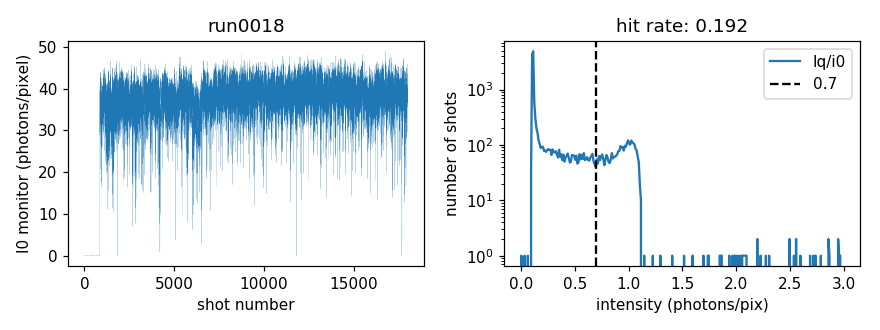

In [5]:
plt.figure(figsize=[8,3])

# i0 monitor
plt.subplot(1,2,1)
plt.title('run%s'%run[:4])
plt.plot(i0[:nshots],lw=.1)
plt.xlabel('shot number')
plt.ylabel('I0 monitor (photons/pixel)')

# hit estimator
plt.subplot(1,2,2)
x,y = do_histogram(metric,0,3,.01)
plt.plot(x,y)
plt.axvline(x=iq_thr,c='black',ls='--')
plt.legend(['Iq/i0',iq_thr])
plt.ylabel('number of shots')
plt.yscale('log',nonposy='clip')
plt.xlabel('intensity (photons/pix)')
plt.title('hit rate: %.3f'%(hit_rate))

plt.tight_layout()
plt.show()